In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [8]:
data = np.genfromtxt(fname='amt-dsox-cal.csv', usecols=range(1, 18), delimiter=",", names=True)
data = data[20:]
data_x = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
print("longterm Samples: {}".format(np.shape(data)[0]))
mean_acc = np.array([np.mean(data["ax"]), np.mean(data["ay"]), np.mean(data["az"])]).round(4)
mean_gyr = np.array([np.mean(data["gx"]), np.mean(data["gy"]), np.mean(data["gz"])]).round(4)
mean_or = np.array([np.mean(data["pitch"]), np.mean(data["roll"]), np.mean(data["heading"])]).round(4)

longterm Samples: 5349


# Gyroscope Calibration

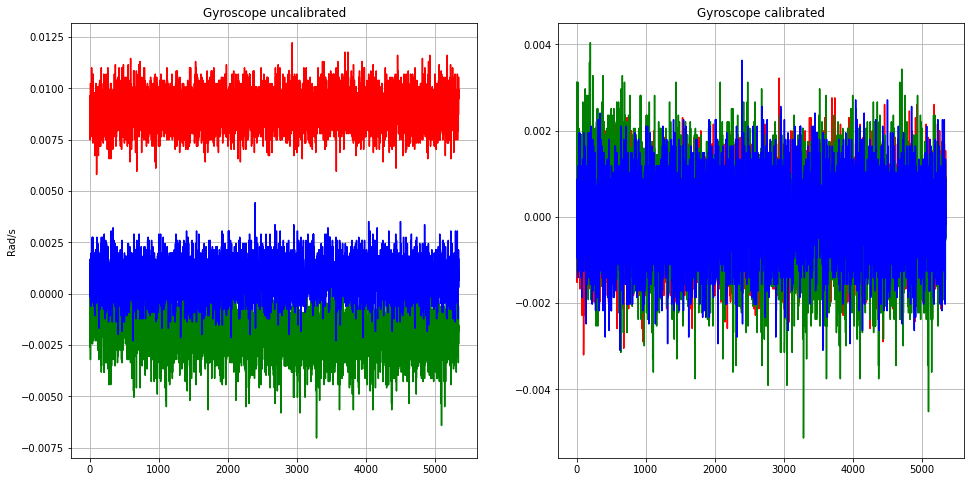

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # a figure with a single Axes
ax1.set_title("Gyroscope uncalibrated")
ax1.grid(True);

#ax1.hist2d(data1_x, data1["gx"], bins=[30,50]);
#ax1.set(ylabel='$m/s^2$', xlabel='Seconds');
#ax1.set_ylim(mean_gyr[0]-0.01, mean_gyr[0]+0.01)
#ax1.set_facecolor("#440154")


ax1.plot(data_x, data["gx"], color='r');
ax1.plot(data_x, data["gy"], color='g');
ax1.plot(data_x, data["gz"], color='b');
ax1.set(ylabel='Rad/s')

ax2.set_title("Gyroscope calibrated")
ax2.grid(True);
ax2.plot(data_x, data["gx"] - mean_gyr[0], color='r');
ax2.plot(data_x, data["gy"] - mean_gyr[1], color='g');
ax2.plot(data_x, data["gz"] - mean_gyr[2], color='b');

# Accelerometer Noise

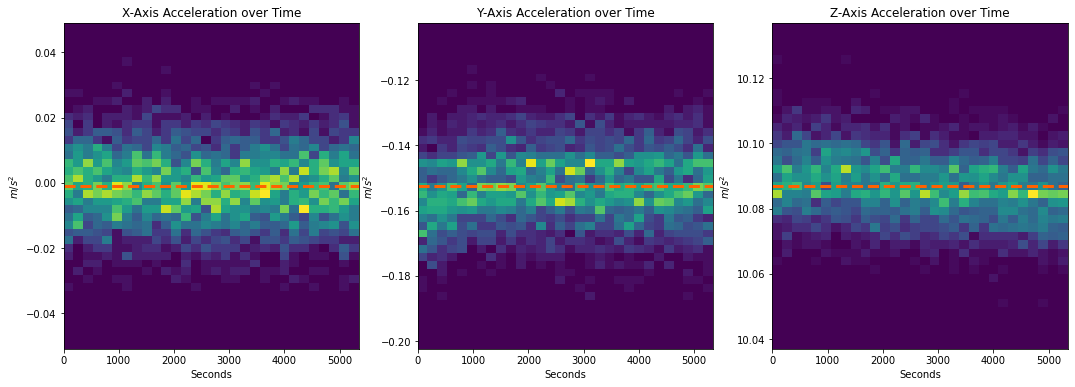

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6), tight_layout=False)
dy = 0.05

axs[0].set_title("X-Axis Acceleration over Time");
axs[0].grid(True);
axs[0].hist2d(data_x, data["ax"], bins=[30,30]);
axs[0].hlines(mean_acc[0], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[0].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[0].set_ylim(mean_acc[0]-dy, mean_acc[0]+dy)
axs[0].set_facecolor("#440154")

axs[1].set_title("Y-Axis Acceleration over Time");
axs[1].grid(True);
axs[1].hist2d(data_x, data["ay"], bins=[30,30]);
axs[1].hlines(mean_acc[1], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[1].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[1].set_ylim(mean_acc[1]-dy, mean_acc[1]+dy)
axs[1].set_facecolor("#440154")

axs[2].set_title("Z-Axis Acceleration over Time");
axs[2].grid(True);
axs[2].hist2d(data_x, data["az"], bins=[30,30]);
axs[2].hlines(mean_acc[2], data_x[0], data_x[-1], linewidth = 3, linestyle="--", color='#ff6100');
axs[2].set(ylabel='$m/s^2$', xlabel='Seconds');
axs[2].set_ylim(mean_acc[2]-dy, mean_acc[2]+dy);
axs[2].set_facecolor("#440154");

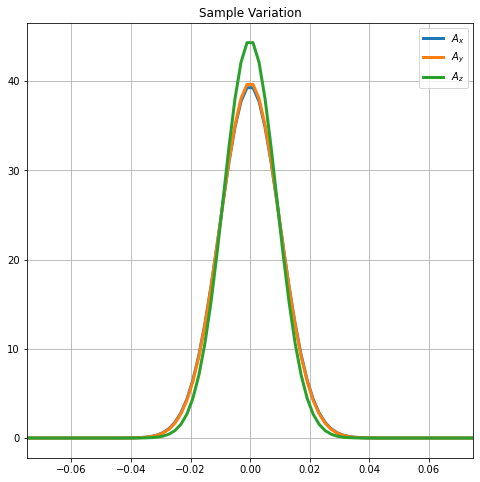

In [11]:
xlim = .1

fig, axs = plt.subplots(1, 1, figsize=(8, 8), tight_layout=False)
axs.set_title("Sample Variation");
x = np.linspace(-xlim, xlim, 100)
axs.plot(x, stats.norm.pdf(x + mean_acc[0], mean_acc[0], np.std(data["ax"])), linewidth=3, linestyle='-', label="$A_x$");
axs.plot(x, stats.norm.pdf(x + mean_acc[1], mean_acc[1], np.std(data["ay"])), linewidth=3, linestyle='-', label="$A_y$");
axs.plot(x, stats.norm.pdf(x + mean_acc[2], mean_acc[2], np.std(data["az"])), linewidth=3, linestyle='-', label="$A_z$");
axs.grid(True);
axs.set_xlim(-xlim*0.75, xlim*0.75)
axs.legend();

# Accelerometer Calibration

In [17]:
data = np.genfromtxt(fname='amt-dsox-cal-dyn.csv', usecols=range(1, 18), delimiter=",", names=True)
data_x = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
print("calibration Samples: {}".format(np.shape(data)[0]))
mean_acc = np.array([np.mean(data["ax"]), np.mean(data["ay"]), np.mean(data["az"])]).round(4)

calibration Samples: 2599


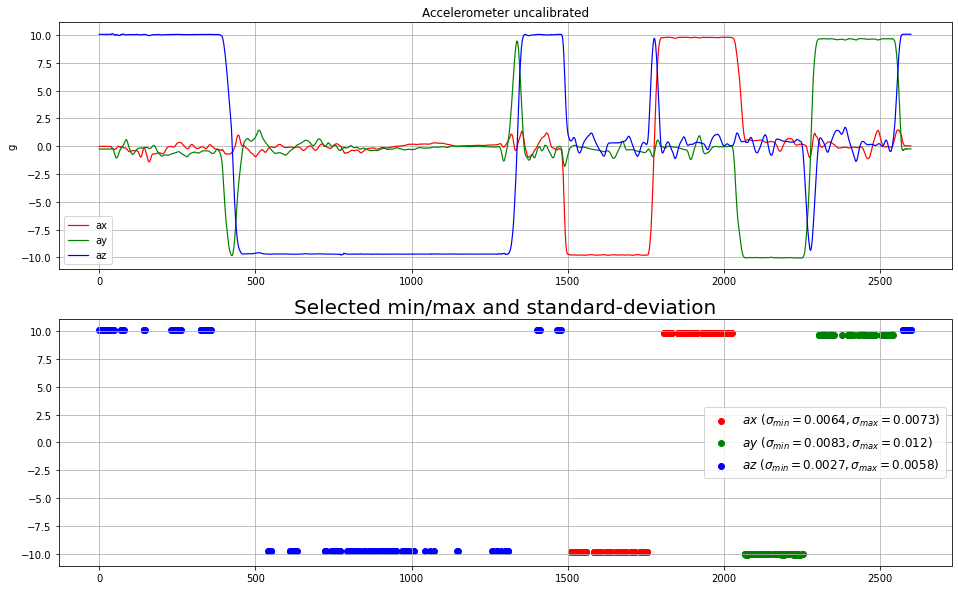

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))  # a figure with a single Axes
ax1.set_title("Accelerometer uncalibrated")
ax1.grid(True);
ax1.plot(data_x, data["ax"], color='red', linewidth=1.2, linestyle='-', label='ax');
ax1.plot(data_x, data["ay"], color='green', linewidth=1.2, linestyle='-', label='ay');
ax1.plot(data_x, data["az"], color='blue', linewidth=1.2, linestyle='-', label='az');
ax1.set(ylabel='g')
ax1.legend();

# select the top n samples but discard 10% with the largest value as they might be outlier
n_top = 150;
n_drop = int(n_top * 0.1);

acc_ax_max = np.argsort(data["ax"])[-n_top:-n_drop]
acc_ax_min = np.argsort(data["ax"])[n_drop:n_top]

acc_ay_max = np.argsort(data["ay"])[-n_top:-n_drop]
acc_ay_min = np.argsort(data["ay"])[n_drop:n_top]

acc_az_max = np.argsort(data["az"])[-n_top:-n_drop]
acc_az_min = np.argsort(data["az"])[n_drop:n_top]

ax2.set_title("Selected min/max and standard-deviation", fontsize=20)
ax2.grid(True);
ax2.scatter(data_x[acc_ax_min], data["ax"][acc_ax_min], color='r', label=r'$ax\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(data["ax"][acc_ax_min]), np.std(data["ax"][acc_ax_max])));
ax2.scatter(data_x[acc_ax_max], data["ax"][acc_ax_max], color='r');
ax2.scatter(data_x[acc_ay_min], data["ay"][acc_ay_min], color='g', label=r'$ay\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(data["ay"][acc_ay_min]), np.std(data["ay"][acc_ay_max])));
ax2.scatter(data_x[acc_ay_max], data["ay"][acc_ay_max], color='g');
ax2.scatter(data_x[acc_az_min], data["az"][acc_az_min], color='b', label=r'$az\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(data["az"][acc_az_min]), np.std(data["az"][acc_az_max])));
ax2.scatter(data_x[acc_az_max], data["az"][acc_az_max], color='b');

acc_ax_max_avg = np.mean(data["ax"][acc_ax_max])
acc_ax_min_avg = np.mean(data["ax"][acc_ax_min])

acc_ay_max_avg = np.mean(data["ay"][acc_ay_max])
acc_ay_min_avg = np.mean(data["ay"][acc_ay_min])

acc_az_max_avg = np.mean(data["az"][acc_az_max])
acc_az_min_avg = np.mean(data["az"][acc_az_min])
ax2.legend(loc='center right', fontsize=12);

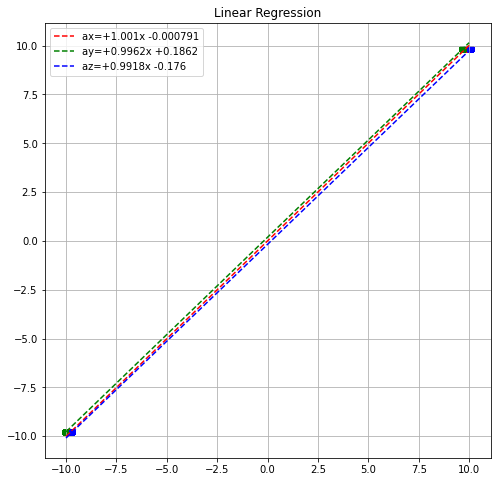

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))  # a figure with a single Axes
ax.set_title("Linear Regression")
ax.grid(True);

acc_a_ref = np.concatenate((np.full(n_top-n_drop, -9.81), np.full(n_top-n_drop, 9.81)))
acc_ax_res = stats.linregress(np.concatenate((data["ax"][acc_ax_min], data["ax"][acc_ax_max])), acc_a_ref)
acc_ay_res = stats.linregress(np.concatenate((data["ay"][acc_ay_min], data["ay"][acc_ay_max])), acc_a_ref)
acc_az_res = stats.linregress(np.concatenate((data["az"][acc_az_min], data["az"][acc_az_max])), acc_a_ref)

ax.scatter(np.concatenate((data["ax"][acc_ax_min], data["ax"][acc_ax_max])), acc_a_ref, color='r');
ax.plot(np.linspace(-10, 10, 10), acc_ax_res.intercept + acc_ax_res.slope*np.linspace(-10, 10, 10), "r--", label='ax={:+.4}x {:+.4}'.format(acc_ax_res.slope, acc_ax_res.intercept))

ax.scatter(np.concatenate((data["ay"][acc_ay_min], data["ay"][acc_ay_max])), acc_a_ref, color='g');
ax.plot(np.linspace(-10, 10, 10), acc_ay_res.intercept + acc_ay_res.slope*np.linspace(-10, 10, 10), "g--", label='ay={:+.4}x {:+.4}'.format(acc_ay_res.slope, acc_ay_res.intercept))

ax.scatter(np.concatenate((data["az"][acc_az_min], data["az"][acc_az_max])), acc_a_ref, color='b');
ax.plot(np.linspace(-10, 10, 10), acc_az_res.intercept + acc_az_res.slope*np.linspace(-10, 10, 10), "b--", label='az={:+.4}x {:+.4}'.format(acc_az_res.slope, acc_az_res.intercept))

ax.legend();